# Iris Classification ML Project

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

First things first, we import all the required modules and we import them with a shortname for ease of use.

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.

In [1]:
import pandas as pd

Pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.

In [2]:
import matplotlib.pyplot as plt

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [3]:
import numpy as np

OS module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module. For creating temporary files and directories see the tempfile module, and for high-level file and directory handling see the shutil module.

In [4]:
import os

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [5]:
import seaborn as sns

Now we read the dataset and save it into a variable. In this case we are using variable "dataset". We use read_csv method from pandas to read the dataset present as an excel file.

Note: Format of the file name is "Directory/Filename.csv". For example: "C:/Users/Rizwan/Documents/Iris.csv". In this case the excel has been saved in the same directory as the project file. That's why we can se the filename directly inmstead opf copying the whole directory.

In [6]:
dataset = pd.read_csv("Iris.csv")

Now before doing any training or model creation, we analyse the available data to find out some insights and features of the data which may be both known or hidden.

So we do some basic state of the art analysis which is always done on every numerical data to get a basic understanding of the structure and usability of the data.

In [7]:
dataset # Print the dataset to visualise what is present in the dataset variable.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


After we see the data we can visualise how it looks. Also we observe that the data contains 150 rows and 6 columns in total.

Now before doing anything we have to clean the data. In this case, there is a column present called "Id" which is of no use to us. In a small dataset, it is not needed. But while doing exploratory data analysis or model creation, the cleaning of data makes the data more professional, easy to visualise/understand and better to work on.
In this case, we are using drop method to remove a whole column.

#### Tip 
If you are having trouble with using a method, it's syntax or what attribute to use, then hover over and click on the method name and press "Shift + Tab", this opens a box, expand it to get info about the syntax, data types, attributes and all othere relevant information that can be used within the method.

In [8]:
dataset = dataset.drop(columns = ["Id"])
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


While making a Data Frame from a csv file, many blank columns are imported as null value into the Data Frame which later creates problems while operating that data frame. Pandas isnull() and notnull() methods are used to check and manage NULL values in a data frame.

In [9]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So there is no null value. But if there was one, we have to manage that blank space by either adding a data after research or deleting the whole row.

The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column:

count: The number of not-empty values.  
mean: The average (mean) value.  
std: The standard deviation.  
min: The minimum value.  
25%: The 25% percentile.  
50%: The 50% percentile.  
75%: The 75% percentile.  
max: The maximum value.

*Percentile meaning: how many of the values are less than the given percentile.

These values comes handy while doing analysis.

In [10]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# Counting total values for each species.
dataset["Species"].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

We start with plotting graphs to visualise the data and for that purpose we use histograms.

Creating a histogram provides a visual representation of data distribution. Histograms can display a large amount of data and the frequency of the data values. The median and distribution of the data can be determined by a histogram. In addition, it can show any outliers or gaps in the data.

<AxesSubplot:>

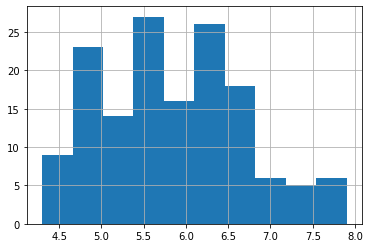

In [13]:
# Lets start with "SepalLengthCm" label.
dataset["SepalLengthCm"].hist()

<AxesSubplot:>

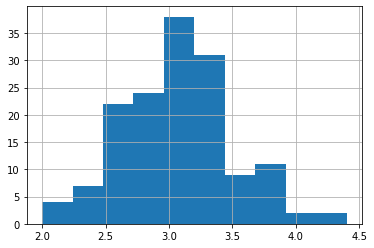

In [14]:
# Similarly we make histogranms for every label excluding species
dataset["SepalWidthCm"].hist()

<AxesSubplot:>

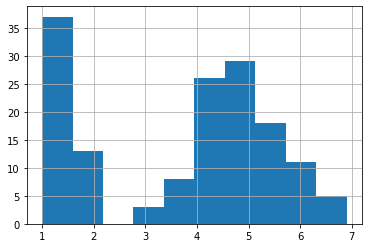

In [15]:
dataset["PetalLengthCm"].hist()

<AxesSubplot:>

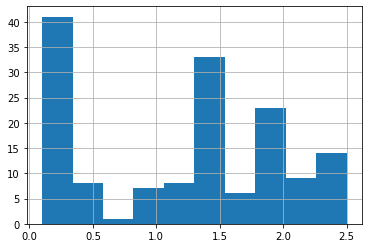

In [16]:
dataset["PetalWidthCm"].hist()

Let's conclude what we got from the histogram and the main reasons behind drawing them.  
We are looking for a normal distribution, which states that there is a pattern in the data. A normal distribution looks like we could draw a bell shaped curve over the histogram. If there is no pattern in the data then we will have to analyse data separately.So, clearly we have a normal distribution.

Also we can use the data and the model will be able to train easily if there are patterns in the data.

Now we draw scatter plots to find out if there is an kind of clustering in the data. Clustering means the relation between two value are closely related. So if the data of each species makeds its own differentiable clusters, then it means that the data is good to use.

In [17]:
# Scatter Plots
colors = ["Red", "Green", "Blue"]
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

We make two lists to assign particular colours to each species. A for loop is used to assign the colours.

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

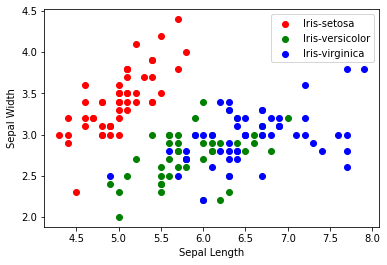

In [18]:
for i in range(3):
    x = dataset[dataset["Species"] == species[i]]
    plt.scatter(x["SepalLengthCm"], x["SepalWidthCm"], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

As observed, this plot tells us that there is a good possibility that the model will be able to differentiate between species if the specie is setosa, but could get confused between viginica and versicolor. We understand this by observing that the green and blue dots are pretty much mixed. So we do this to find relationship between all other labels.

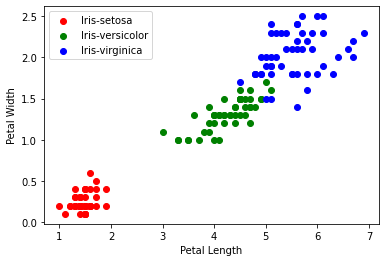

In [19]:
for i in range(3):
    x = dataset[dataset["Species"] == species[i]]
    plt.scatter(x["PetalLengthCm"], x["PetalWidthCm"], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

Now there is more clarity and the clusters are differentiable. So we can say that these two labels are good for our model.

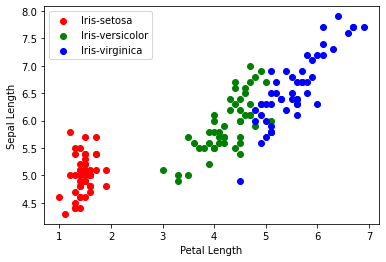

In [20]:
for i in range(3):
    x = dataset[dataset["Species"] == species[i]]
    plt.scatter(x["PetalLengthCm"], x["SepalLengthCm"], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()

Similarly, these two labels are also good.

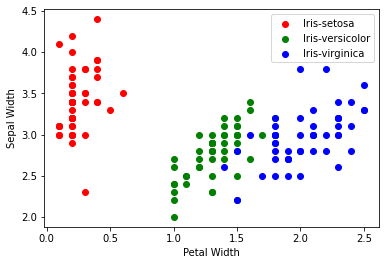

In [21]:
for i in range(3):
    x = dataset[dataset["Species"] == species[i]]
    plt.scatter(x["PetalWidthCm"], x["SepalWidthCm"], c = colors[i], label = species[i])
plt.xlabel("Petal Width")
plt.ylabel("Sepal Width")
plt.legend()

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [22]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

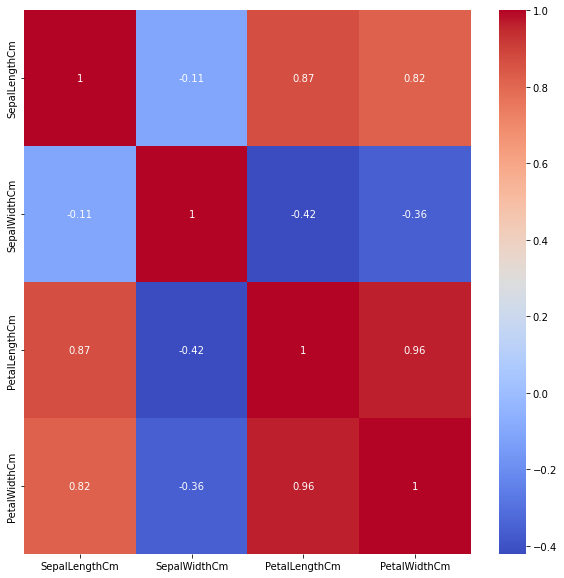

In [23]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corr, annot = True, ax = ax, cmap = "coolwarm")

Now we import LabelEncoder from sklearn. Encode target labels with value between 0 and n_classes-1. This transformer should be used to encode target values, i.e. y, and not the input X.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

We use LabelEncoder to label 0,1 and 2 to each species respectively.

In [25]:
dataset["Species"] = le.fit_transform(dataset["Species"])
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now we use train_test_split method to split the data into training and testing data.

In [42]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns = ["Species"])
Y = dataset["Species"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

There are a lots of models which we can use for our purpose. So we will try ut some of the state of the art models to see if we can get good accuracy. Let's start with logistic regression model.

Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).

In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Model Training
model.fit(x_train, y_train)

# Checking Model Performance
print("Accuracy = ", model.score(x_test, y_test)*100)

Accuracy =  93.33333333333333


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


So we are already getting 100 percent accuracy. This is because this is a small and easy dataset to work with. In real life projects, the data we get might be more complex and hard to find patterns in.

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [44]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("Accuracy = ", model.score(x_test, y_test)*100)

Accuracy =  95.55555555555556


A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [45]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Accuracy = ", model.score(x_test, y_test)*100)

Accuracy =  91.11111111111111


So all our models are predicting well and getting good accuracies. Also accuracies may be improved using other models after experimenting with the train and test data.

Thank you and hoping you got an introductory idea of Artificial intelligence/Machine learning/Data exploration & Classification.